<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.447246,21.748219,-105.570879,-22.375414,6.836940,-29.212354
1,0.0,1.0,71.716574,26.589642,108.755939,217.062155,383.671168,-166.609014
2,0.0,2.0,58.917419,87.538590,1252.603161,1409.059170,541.005801,868.053369
3,0.0,3.0,92.559114,86.245673,96.598541,285.403328,1108.840209,-823.436881
4,0.0,4.0,34.449513,25.611295,113.976246,184.037054,-260.242715,444.279769
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.750850,68.483481,-1099.838133,-948.603802,567.708814,-1516.312617
19996,999.0,16.0,72.816641,30.047052,-40.272487,72.591206,-441.111035,513.702241
19997,999.0,17.0,56.286863,98.196476,3597.625761,3762.109100,1594.786869,2167.322231
19998,999.0,18.0,30.347376,56.359620,582.612618,679.319614,888.501526,-209.181912


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.447246,21.748219,-105.570879,-22.375414,6.836940,-29.212354
1,0.0,1.0,71.716574,26.589642,108.755939,217.062155,383.671168,-166.609014
2,0.0,2.0,58.917419,87.538590,1252.603161,1409.059170,541.005801,868.053369
3,0.0,3.0,92.559114,86.245673,96.598541,285.403328,1108.840209,-823.436881
4,0.0,4.0,34.449513,25.611295,113.976246,184.037054,-260.242715,444.279769
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.750850,68.483481,-1099.838133,-948.603802,567.708814,-1516.312617
19996,999.0,16.0,72.816641,30.047052,-40.272487,72.591206,-441.111035,513.702241
19997,999.0,17.0,56.286863,98.196476,3597.625761,3762.109100,1594.786869,2167.322231
19998,999.0,18.0,30.347376,56.359620,582.612618,679.319614,888.501526,-209.181912


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    51.447246  21.748219  -105.570879   -22.375414     6.836940   
      1.0    71.716574  26.589642   108.755939   217.062155   383.671168   
      2.0    58.917419  87.538590  1252.603161  1409.059170   541.005801   
      3.0    92.559114  86.245673    96.598541   285.403328  1108.840209   
      4.0    34.449513  25.611295   113.976246   184.037054  -260.242715   
...                ...        ...          ...          ...          ...   
999.0 15.0   72.750850  68.483481 -1099.838133  -948.603802   567.708814   
      16.0   72.816641  30.047052   -40.272487    72.591206  -441.111035   
      17.0   56.286863  98.196476  3597.625761  3762.109100  1594.786869   
      18.0   30.347376  56.359620   582.612618   679.319614   888.501526   
      19.0   49.694871  90.983038  1785.882788  1936.560697  1504.935386   

                   e_hat  
rep   index               
0.0   0.0     -29.212354  
      1.0    -166.609014  
      2.0     868.053369  
      3.0    -823.436881  
      4.0     444.279769  
...                  ...  
999.0 15.0  -1516.312617  
      16.0    513.702241  
      17.0   2167.322231  
      18.0   -209.181912  
      19.0    431.625311  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    51.447246  21.748219  -105.570879   -22.375414     6.836940   
      1.0    71.716574  26.589642   108.755939   217.062155   383.671168   
      2.0    58.917419  87.538590  1252.603161  1409.059170   541.005801   
      3.0    92.559114  86.245673    96.598541   285.403328  1108.840209   
      4.0    34.449513  25.611295   113.976246   184.037054  -260.242715   
...                ...        ...          ...          ...          ...   
999.0 15.0   72.750850  68.483481 -1099.838133  -948.603802   567.708814   
      16.0   72.816641  30.047052   -40.272487    72.591206  -441.111035   
      17.0   56.286863  98.196476  3597.625761  3762.109100  1594.786869   
      18.0   30.347376  56.359620   582.612618   679.319614   888.501526   
      19.0   49.694871  90.983038  1785.882788  1936.560697  1504.935386   

                   e_hat  
rep   index               
0.0   0.0     -29.212354  
      1.0    -166.609014  
      2.0     868.053369  
      3.0    -823.436881  
      4.0     444.279769  
...                  ...  
999.0 15.0  -1516.312617  
      16.0    513.702241  
      17.0   2167.322231  
      18.0   -209.181912  
      19.0    431.625311  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,51.447246,21.748219,-105.570879,-22.375414,6.836940,-29.212354
1,0.0,1.0,71.716574,26.589642,108.755939,217.062155,383.671168,-166.609014
2,0.0,2.0,58.917419,87.538590,1252.603161,1409.059170,541.005801,868.053369
3,0.0,3.0,92.559114,86.245673,96.598541,285.403328,1108.840209,-823.436881
4,0.0,4.0,34.449513,25.611295,113.976246,184.037054,-260.242715,444.279769
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.750850,68.483481,-1099.838133,-948.603802,567.708814,-1516.312617
19996,999.0,16.0,72.816641,30.047052,-40.272487,72.591206,-441.111035,513.702241
19997,999.0,17.0,56.286863,98.196476,3597.625761,3762.109100,1594.786869,2167.322231
19998,999.0,18.0,30.347376,56.359620,582.612618,679.319614,888.501526,-209.181912


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    51.447246  21.748219  -105.570879   -22.375414     6.836940   
      1.0    71.716574  26.589642   108.755939   217.062155   383.671168   
      2.0    58.917419  87.538590  1252.603161  1409.059170   541.005801   
      3.0    92.559114  86.245673    96.598541   285.403328  1108.840209   
      4.0    34.449513  25.611295   113.976246   184.037054  -260.242715   
...                ...        ...          ...          ...          ...   
999.0 15.0   72.750850  68.483481 -1099.838133  -948.603802   567.708814   
      16.0   72.816641  30.047052   -40.272487    72.591206  -441.111035   
      17.0   56.286863  98.196476  3597.625761  3762.109100  1594.786869   
      18.0   30.347376  56.359620   582.612618   679.319614   888.501526   
      19.0   49.694871  90.983038  1785.882788  1936.560697  1504.935386   

                   e_hat  
rep   index               
0.0   0.0     -29.212354  
      1.0    -166.609014  
      2.0     868.053369  
      3.0    -823.436881  
      4.0     444.279769  
...                  ...  
999.0 15.0  -1516.312617  
      16.0    513.702241  
      17.0   2167.322231  
      18.0   -209.181912  
      19.0    431.625311  

[20000 rows x 6 columns]

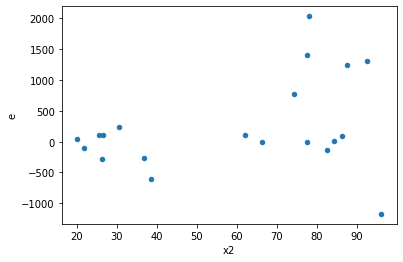

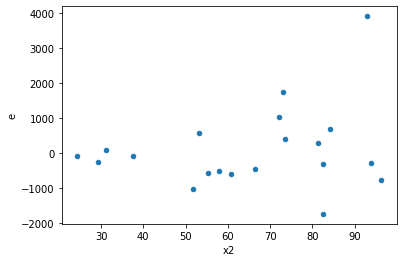

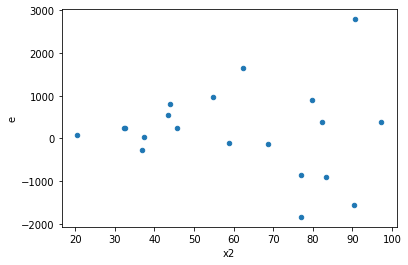

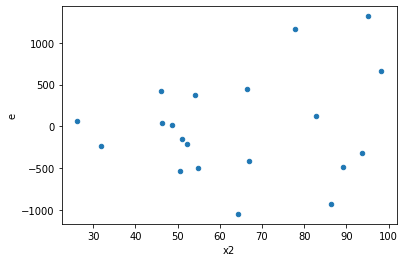

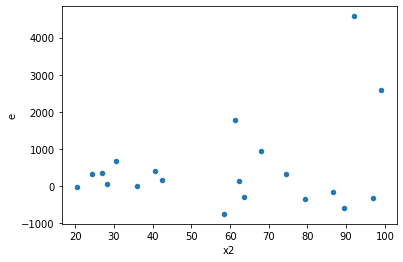

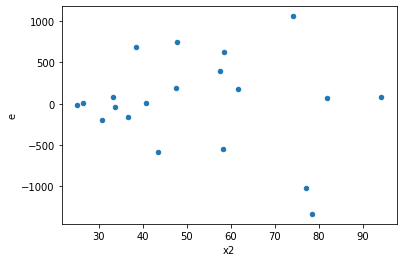

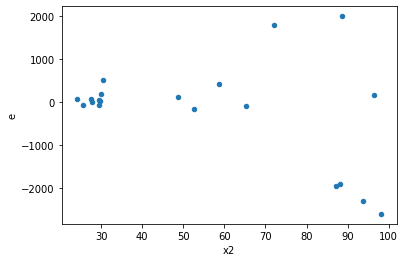

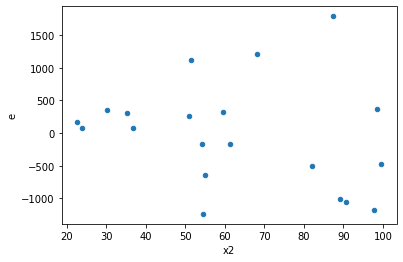

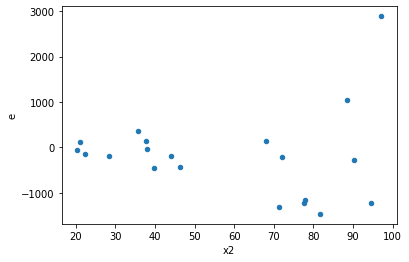

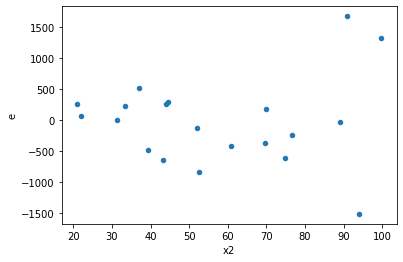

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,283930.58272811933,5219870.988958359,47321.76378801989,869978.4981597265,18.38432105060236,0.0025377630600444956,0.9987311184699778,0.0012688815300222478,Reject001=0 : Heteroscedasticity
1.0,6.0,6.0,1417090.153685408,13279130.515906053,236181.69228090133,2213188.4193176753,9.370702690560082,0.015437557308429328,0.9922812213457853,0.007718778654214664,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,573524.4856971208,10482676.930327196,95587.41428285347,1747112.8217211992,18.277644968523827,0.0025789800816196085,0.9987105099591902,0.0012894900408098042,Reject001=0 : Heteroscedasticity
3.0,6.0,6.0,510733.05031364725,4236459.630450046,85122.17505227454,706076.6050750077,8.294860941245892,0.02105952178986792,0.989470239105066,0.01052976089493396,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,387205.0542616345,18480782.925971042,64534.175710272415,3080130.4876618404,47.728671727212465,0.00016757554672186536,0.9999162122266391,8.378777336093268e-05,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,271643.0613357201,2994857.136881453,45273.843555953354,499142.85614690883,11.024971969301097,0.010115064710919164,0.9949424676445404,0.005057532355459582,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,33804.911195788016,18159349.211857263,5634.151865964669,3026558.2019762103,537.1807991650592,1.2794819359562837e-07,0.9999999360259032,6.397409679781418e-08,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,949932.0850646193,6682900.686588381,158322.01417743656,1113816.7810980636,7.035135239309003,0.031713635484854175,0.9841431822575729,0.015856817742427087,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,420136.37120450736,7166956.022466123,70022.72853408456,1194492.6704110205,17.058642178297642,0.0031202176508173807,0.9984398911745913,0.0015601088254086903,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,283930.58272811933,5219870.988958359,47321.76378801989,869978.4981597265,18.38432105060236,0.0025377630600444956,Reject001=0 : Heteroscedasticity
1.0,6.0,6.0,1417090.153685408,13279130.515906053,236181.69228090133,2213188.4193176753,9.370702690560082,0.015437557308429328,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,573524.4856971208,10482676.930327196,95587.41428285347,1747112.8217211992,18.277644968523827,0.0025789800816196085,Reject001=0 : Heteroscedasticity
3.0,6.0,6.0,510733.05031364725,4236459.630450046,85122.17505227454,706076.6050750077,8.294860941245892,0.02105952178986792,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,387205.0542616345,18480782.925971042,64534.175710272415,3080130.4876618404,47.728671727212465,0.00016757554672186536,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,271643.0613357201,2994857.136881453,45273.843555953354,499142.85614690883,11.024971969301097,0.010115064710919164,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,33804.911195788016,18159349.211857263,5634.151865964669,3026558.2019762103,537.1807991650592,1.2794819359562837e-07,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,949932.0850646193,6682900.686588381,158322.01417743656,1113816.7810980636,7.035135239309003,0.031713635484854175,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,420136.37120450736,7166956.022466123,70022.72853408456,1194492.6704110205,17.058642178297642,0.0031202176508173807,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    518
Reject001=1 : Homoscedasticity      482
Name: Result_test, dtype: int64